## 시계열 분석 개념
- 시계열 데이터를 통해 시간의 흐름에 따른 종속변수의 변화를 예측하는 것으로 주가, 환율, 원별 재고량 등이 시계열 자료에 해당된다.
- 회귀분석은 변수 간의 독립성을 전제로 분석을 하지만 시계열 분석은 변수 간의 자기상관성을 전제로 한다는 것이 가장 큰 차이이며 회귀분석의 경우 순서에 영향을 받지 않지만 시계열 분석은 데이터의 순서가 매우 중요하다.
- 정상 시계열 분석과 비정상 시계열 분석으로 구분. 정상성 조건을 모두 만족시키면 정상 시계열, 정상성 조건을 하나라도 만족하지 못하면 비정상 시계열이라 한다.
- 시계열 분석에서 대부분의 자료는 비정상 시계열 자료이므로 이를 정상시계열로 변환한 후에 분석을 수행한다.
- 정상시계열은 추세성, 계절성 등의 패턴을 보이지 않으며 자료의 변화 폭이 일정하고 시간의 흐름에 따라 자기 상관성이 상이하지 않다는 특징을 가지게 된다.
  [정상성의 조건]  
  - 시계열의 평균이 시간에 따라서 일정하다.
  - 분산이 시점에 의존하지 않고 일정하다.
  - 시점간의 공분산이 특정 시점에 의존하지 않고 오직 시차에만 의존한다. 즉 t 시점과 t-1 시점의 공분산은 t 시점과 t+1 시점의 공분산과 같다는 것을 의미한다.
- 평균이 일정하지 않은 경우에는 현시점 자료에서 이전 시점 자료를 빼는 차분을 통해 정상 시계열화할 수 있다.
- 시계열 데이터가 계절성을 가지는 경우에는 현시점 자료에서 여러 시점 전의 자료를 빼는 계절차분을 이용한다.
- 분산이 일정하지 않은 경우에는 변환을 통해 정상 시계열화할 수 있다.  
- 시계열은 추세요인, 계절요인, 순환요인, 불규칙요인으로 구성되며 이들 요인이 복잡하게 혼합되어 하나의 시계열 데이터를 구성한다. 분석목적에 따라 특정요인만을 분리해 분석하거나 제거하는 작업을 하게 되는데 이를 분해시계열이라고 한다.

[시계열의 구성요소]  
  - 추세요인 : 인구의 증가, 기술의 변화 등과 같은 요인에 의해 장기간 일정한 방향으로 상승 또는 하락하는 경향을 보이는 요인으로 급격한 충격이 없는 한 지속되는 특징이 있다.
  - 순환요인 : 정확히 알려진 이유가 없고 주기가 일정하지 않은 변동을 순환요인이라고 한다. 보통 추세선을 따라 상하로 반복 운동하는 형태로 나타난다.
  - 계절요인 : 요일별, 월별, 분기별, 계절별 일정한 주기를 가지는 상하 반복의 규칙적인 변동을 계절변동이라 한다. 매년 같은 시기에 유사한 패턴으로 나타나므로 예측하기가 상대적으로 쉬우며 순환요인보다 주기가 짧은 것이 특징이다.
  - 불규칙요인 : 위의 세가지 요인으로 설명하지 못하는 오차에 해당하는 요인으로 어떠한 규칙성 없이 우연히 발생하는 예측 불가능한 변동이다.


In [3]:
!pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 866.6 kB/s eta 0:00:00
     ------------------------------------ 233.8/233.8 kB 622.8 kB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

airline = pd.read_csv('AirPassengers.csv', index_col='Month',parse_dates=True)
print(airline)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]


In [5]:
data = airline.rename({'#Passengers':'passengers'},axis=1)
data

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Figure size 720x576 with 0 Axes>

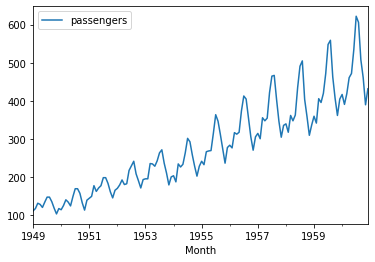

In [6]:
plt.style.use('default')
plt.figure(figsize=(10,8))
data.plot()
plt.show()

<Figure size 720x720 with 0 Axes>

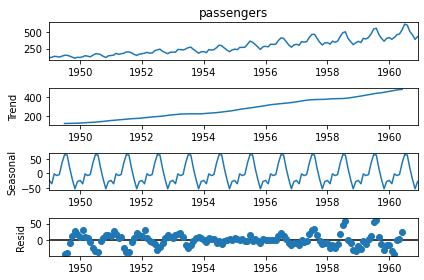

In [7]:
result = seasonal_decompose(data['passengers'],model='addictive')
plt.figure(figsize=(10,10))
result.plot()
plt.show()

In [8]:
!pip install pmdarima

     -------------------------------------- 571.9/571.9 kB 6.0 MB/s eta 0:00:00
     -------------------------------------- 986.3/986.3 kB 7.8 MB/s eta 0:00:00


In [ ]:
'''
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )
'''


- y: array 형태의 시계열 자료
- d (기본값 = none): 차분의 차수, 이를 지정하지 않으면 실행 기간이 매우 길어질 수 있음
- start_p (기본값 = 2), max_p (기본값 = 5): AR(p)를 찾을 범위 (start_p에서 max_p까지 찾는다!)
- start_q (기본값 = 2), max_q (기본값 = 5): MA(q)를 찾을 범위 (start_q에서 max_q까지 찾는다!)
- m (기본값 = 1): 계절적 차분이 필요할 때 쓸 수 있는 모수로 m=4이면 분기별, m=12면 월별, m=1이면 계절적 특징을 띠지 않는 데이터를 의미한다. m=1이면 자동적으로 seasonal 에 대한 옵션은 False로 지정된다.
- seasonal (기본값 = True): 계절성 ARIMA 모형을 적합할지의 여부
- stepwise (기본값 = True): 최적의 모수를 찾기 위해 쓰는 힌드만 - 칸다카르 알고리즘을 사용할지의 여부, False면 모든 모수 조합으로 모형을 적합한다.
- trace (기본값 = False): stepwise로 모델을 적합할 때마다 결과를 프린트하고 싶을 때 사용한다.


In [10]:
train = data.iloc[:len(data)-29]
test = data.iloc[len(data)-29:]

In [11]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(train, start_p=1,start_q=1,
                             max_p=3, max_q=3,m=12,
                             start_P = 1, start_Q = 1, max_P=3, max_Q=3,
                             seasonal = True, d=1, D=1, trace=True,
                             error_action = 'ignore',
                             suppress_warning=True, stepwise=False)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.64 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=756.988, Time=0.16 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=758.826, Time=0.25 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=758.186, Time=0.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=756.959, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=758.922, Time=0.12 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=754.685, Time=0.86 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=758.869, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=760.726, Time=0.36 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=756.686, Time=1.13 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=759.643, Time=0.26 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=756.688, Time=1.45 sec
 ARIMA(0,1,1)(0,1,0)[1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -370.278
Date:                                    Fri, 11 Nov 2022   AIC                            752.557
Time:                                            17:07:29   BIC                            768.307
Sample:                                        01-01-1949   HQIC                           758.934
                                             - 07-01-1958                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2218      0.093     -2.388      0.017      -0.404      -0.040
ar.S.L12       0.9288      0.275      3.374      0.001       0.389       1.468
ma.S.L12      -1.2065      0.448     -2.692      0.007      -2.085      -0.328
ma.S.L24       0.2771      0.174      1.596      0.111      -0.063       0.618
ma.S.L36       0.1251      0.164      0.765      0.444      -0.195       0.446
sigma2        75.0386     19.073      3.934      0.000      37.656     112.421
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.50
Prob(Q):                              0.91   Prob(JB):                         0.29
Heteroskedasticity (H):               1.05   Skew:                             0.37
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings;warnings.filterwarnings('ignore')

model = SARIMAX(train['passengers'],
               order = (1,1,0),
               seasonal_order=(1,1,2,12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                              passengers   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -370.574
Date:                                 Fri, 11 Nov 2022   AIC                            751.148
Time:                                         17:12:02   BIC                            764.273
Sample:                                     01-01-1949   HQIC                           756.462
                                          - 07-01-1958                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2366      0.093     -2.538      0.011      -0.419      -0.054
ar.S.L12       0.9988      0.187      5.351      0.000       0.633       1.365
ma.S.L12      -1.3723      2.642     -0.519      0.603      -6.550       3.805
ma.S.L24       0.3948      0.951      0.415      0.678      -1.470       2.259
sigma2        69.6780    171.957      0.405      0.685    -267.352     406.708
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.76
Prob(Q):                              0.88   Prob(JB):                         0.25
Heteroskedasticity (H):               1.10   Skew:                             0.38
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

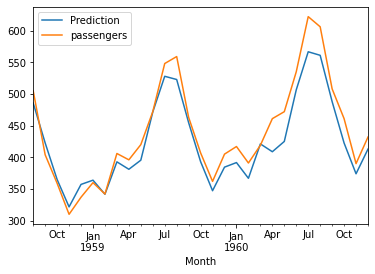

In [14]:
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start,end,typ='levels').rename('Prediction')

predictions.plot(legend=True)
test['passengers'].plot(legend=True)

In [15]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
print('rmse:', rmse(test.passengers,predictions))
print('mse:', mean_squared_error(test.passengers,predictions))

rmse: 25.941766752086664
mse: 672.9752622196692


<AxesSubplot:xlabel='Month'>

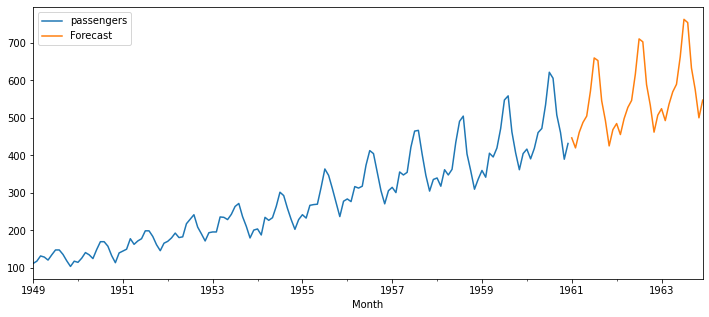

In [16]:
# 3년간 예측

model = SARIMAX(data.passengers, order=(1,1,0), seasonal_order=(1,1,2,12))
result = model.fit()
forecast = result.predict(start=len(data),end=(len(data)-1)+3*12,
                         typ = 'level').rename('Forecast')
data.passengers.plot(figsize=(12,5),legend=True)
forecast.plot(legend=True)

In [17]:
np.round(forecast,2)

1961-01-01    446.98
1961-02-01    420.18
1961-03-01    461.63
1961-04-01    488.15
1961-05-01    505.06
1961-06-01    571.86
1961-07-01    660.18
1961-08-01    653.17
1961-09-01    546.00
1961-10-01    493.00
1961-11-01    425.53
1961-12-01    468.91
1962-01-01    485.15
1962-02-01    455.80
1962-03-01    498.36
1962-04-01    528.21
1962-05-01    546.72
1962-06-01    616.85
1962-07-01    710.99
1962-08-01    703.17
1962-09-01    588.93
1962-10-01    533.78
1962-11-01    462.23
1962-12-01    507.48
1963-01-01    524.78
1963-02-01    493.00
1963-03-01    536.61
1963-04-01    569.75
1963-05-01    589.81
1963-06-01    663.22
1963-07-01    763.08
1963-08-01    754.46
1963-09-01    633.30
1963-10-01    576.03
1963-11-01    500.47
1963-12-01    547.56
Freq: MS, Name: Forecast, dtype: float64